# Pick your 🦖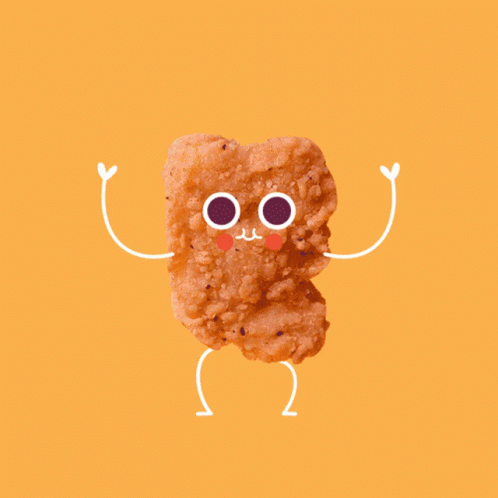

By: Vivian Lin, Ada Mo, Michelle Hong, Ivan Chen

In [1]:
import pandas as bpd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
# read two csv files containing the dino dataframes that will be used
dino = bpd.read_csv('dinosaur.csv')
dino2 = bpd.read_csv('data.csv')

In [3]:
# capitalize dino names in second df to merge with first df
def titled(string):
    return string[0].upper() + string[1:]

cap_names = dino2.get('name').apply(titled)
dino2 = dino2.assign(name=cap_names)

# merge dataframes into main datafram that will be used
dino3 = dino.merge(dino2, left_on="Name", right_on="name")
dino3

,Name,Period,Diet,Country,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,Aardonyx,Jurassic,herbivore,South Africa,Aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,Abelisaurus,Cretaceous,carnivore,South America,Abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,Achelousaurus,Cretaceous,herbivore,North America,Achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,Achillobator,Cretaceous,carnivore,Mongolia,Achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,Acrocanthosaurus,Cretaceous,carnivore,North America,Acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Yuanmousaurus,Jurassic,herbivore,A mamenchisaurid sauropod.,Yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
308,Yunnanosaurus,Jurassic,herbivore,A basal sauropodomorph.,Yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...
309,Zalmoxes,Cretaceous,herbivore,Romania,Zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...
310,Zephyrosaurus,Cretaceous,herbivore,North America,Zephyrosaurus,herbivorous,Early Cretaceous 120-110 million years ago,USA,euornithopod,1.8m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Sues (1980),schaffi,https://www.nhm.ac.uk/discover/dino-directory/...


In [4]:
# categorize dinos into the 3 time periods
is_jurassic = [True if 'Jurassic' in period else False for period in np.array(dino3.get("Period"))]
is_cretaceous = [True if 'Cretaceous' in period else False for period in np.array(dino3.get("Period"))]
is_triassic = [True if 'Triassic' in period else False for period in np.array(dino3.get("Period"))]

# add the booleans to each of the 3 time periods
cate_dino = dino3.assign(Jurassic = is_jurassic)
cate_dino = cate_dino.assign(Cretaceous = is_cretaceous)
cate_dino = cate_dino.assign(Triassic = is_triassic)

# dataframes with only dinos from that time period
only_jurassic=cate_dino[cate_dino.get('Period')=='Jurassic']
only_cretaceous=cate_dino[cate_dino.get('Period')=='Cretaceous']
only_triassic=cate_dino[cate_dino.get('Period')=='Triassic']

In [5]:
# allow user to decide what time period they want their dinos from
time_period = ''
while time_period not in ['Jurassic' , 'Cretaceous', 'Triassic']:
    time_period = input("Enter a time period (Jurassic , Cretaceous, Triassic): ")
    if time_period not in ['Jurassic' , 'Cretaceous', 'Triassic']:
        print("Not a valid time period, please try again.")

Enter a time period (Jurassic , Cretaceous, Triassic): Jurassic


In [6]:
new_dino = cate_dino[cate_dino.get(time_period)]
new_dino

,Name,Period,Diet,Country,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,Jurassic,Cretaceous,Triassic
0,Aardonyx,Jurassic,herbivore,South Africa,Aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
6,Afrovenator,Jurassic,carnivore,Niger,Afrovenator,carnivorous,Early Cretaceous 132-121 million years ago,Niger,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Sereno Wilson Larsson Dutheil and Sues (1944),abakensis,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
7,Agilisaurus,Jurassic,herbivore,China,Agilisaurus,herbivorous,Late Jurassic 169-159 million years ago,China,euornithopod,1.5m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Peng (1990),louderbacki,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
13,Allosaurus,Jurassic,carnivore,North America,Allosaurus,carnivorous,Late Jurassic 156-144 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Marsh (1877),fragilis,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
14,Allosaurus,Jurassic,carnivore,"Tanzania, USA, & Portugal",Allosaurus,carnivorous,Late Jurassic 156-144 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Marsh (1877),fragilis,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Yimenosaurus,Jurassic,herbivore,A large basal sauropodomorph.,Yimenosaurus,herbivorous,Early Jurassic 195-190 million years ago,China,sauropod,9.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Bai Yang and Wang (1990),youngi,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
305,Yingshanosaurus,Jurassic,herbivore,China,Yingshanosaurus,herbivorous,Late Jurassic 159-142 million years ago,China,armoured dinosaur,NaN,Dinosauria Ornithischia Genasauria Thyreophora...,Watanabe (1992),jichuanensis,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
306,Yinlong,Jurassic,herbivore,A basal ceratopsian.,Yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
307,Yuanmousaurus,Jurassic,herbivore,A mamenchisaurid sauropod.,Yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False


In [7]:
# ask user how many dinos they want and store that amount
sample = -10
image = Image.open("small_nugget.png")
while int(sample) > 10 or int(sample) < 1 or not sample.isnumeric():
    sample = input("Enter a number from 1 to 10: ")
    if (sample[0] == '-' and sample[1:].isnumeric()) or sample == '0':
        print ("Please grab more nuggets, we have plenty. Pick a number from 1 to 10.")
    elif not sample.isnumeric():
        sample = 0
        print("Hey! That\'s not a number! Pick a number from 1 to 10.")
    elif int(sample) > 10 or int(sample) < 0:
        sample = -10
        print('Don\'t be greedy! Pick a number from 1 to 10.')

Enter a number from 1 to 10: 5


In [8]:
sampled = new_dino.sample(n=int(sample))
sampled_arr = np.array(sampled.get("Name"))
sampled_arr

array(['Compsognathus', 'Barapasaurus', 'Heterodontosaurus',
       'Coelophysis', 'Europasaurus'], dtype=object)

Here is your bag of nuggets of 5 nuggets!


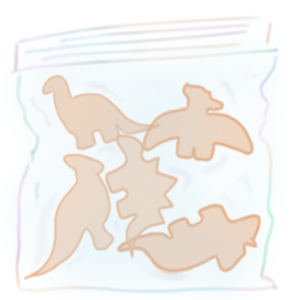

,Name,Period,Diet,Country,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,Jurassic,Cretaceous,Triassic
74,Compsognathus,Jurassic,carnivore,Germany & France,Compsognathus,carnivorous,Late Jurassic 145-140 million years ago,Germany,small theropod,0.65m,Dinosauria Saurischia Theropoda Neotheropoda T...,Wagner (1859),longipes,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
41,Barapasaurus,Early Jurassic,herbivore,India,Barapasaurus,herbivorous,Early Jurassic 185-170 million years ago,India,sauropod,14.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Jain Kutty Roy-Chowdhury and Chatterjee (1975),tagorei,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
133,Heterodontosaurus,Jurassic,omnivore,South Africa,Heterodontosaurus,herbivorous,Early Jurassic 205 million years ago,South Africa,euornithopod,1.2m,Dinosauria Ornithischia Genasauria Cerapoda He...,Crompton and Charig (1962),tucki,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
71,Coelophysis,Jurassic,carnivore,"USA, South Africa, & Zimbabwe",Coelophysis,carnivorous,Late Triassic 225-190 million years ago,Zimbabwe,small theropod,2.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,bauri,NaN,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False
107,Europasaurus,Jurassic,herbivore,Germany,Europasaurus,herbivorous,Late Jurassic 154-151 million years ago,Germany,sauropod,6.2m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Sander Mateus Laven and Knötschke (2006),holgeri,https://www.nhm.ac.uk/discover/dino-directory/...,True,False,False


In [9]:
print ('Here is your bag of nuggets of ' + sample + ' nuggets!')
display(image)
sampled

In [10]:
dino_name = ""
while dino_name not in sampled_arr:
    dino_name = input("Enter a dinosaur name: ")
    if dino_name not in sampled_arr:
        print("That\'s not a dino in your bag! Try again.")
print("Your chosen dino is: " + dino_name)

Enter a dinosaur name: Compsognathus
Your chosen dino is: Compsognathus


In [11]:
# diet distribution
def dino_diet (dino_name,period_df): #dino_name depends on user input
    grp_p_df = period_df.groupby('diet').count()
    diet = period_df[period_df.get('Name')== dino_name].get('diet').iloc[0]
    samp_df = sampled.groupby('diet').count()
    print("The selected dinosaur is: " + diet)
#     all dinos in time period
    grp_p_df.plot(kind = 'bar',y = 'Name', legend = False, title = 'Diet of Dinos in the ' + time_period + ' Period')
#     dinos in selected sample
    samp_df.plot(kind = 'bar',y = 'Name', legend = False, title = 'Diet of Dinos in Your Bag')

The selected dinosaur is: carnivorous


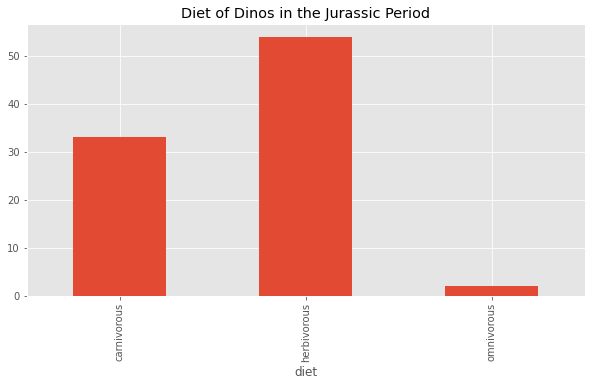

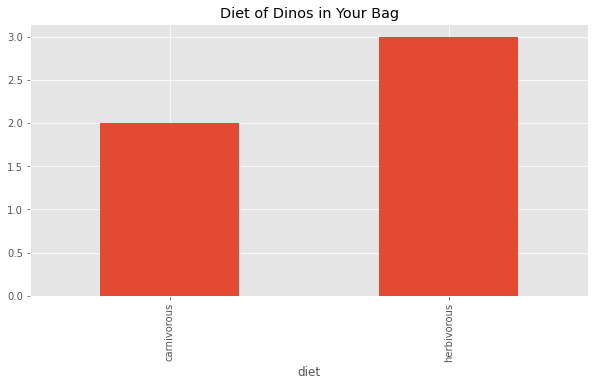

In [12]:
# runs dino_diet functions to print visualizations
if time_period == "Jurassic":
    dino_diet(dino_name, only_jurassic)
elif time_period == "Triassic":
    dino_diet(dino_name, only_triassic)
else:
    dino_diet(dino_name, only_cretaceous)

In [13]:
# lived-in distribution
def dino_lived (dino_name,period_df): #dino_name depends on user input
    grp_p_df = period_df.groupby('lived_in').count()
    lived = period_df[period_df.get('Name') == dino_name].get('lived_in').iloc[0]
    samp_df = sampled.groupby('lived_in').count()
    print("The selected dinosaur lived in: " + lived)
#     all dinos in time period
    grp_p_df.plot(kind = 'bar',y = 'Name', legend = False, title = 'Living Areas of Dinos in the ' + time_period + ' Period')
#     dinos in selected sample
    samp_df.plot(kind = 'bar',y = 'Name', legend = False, title = 'Living Areas of Dinos in Your Bag')

The selected dinosaur lived in: Germany


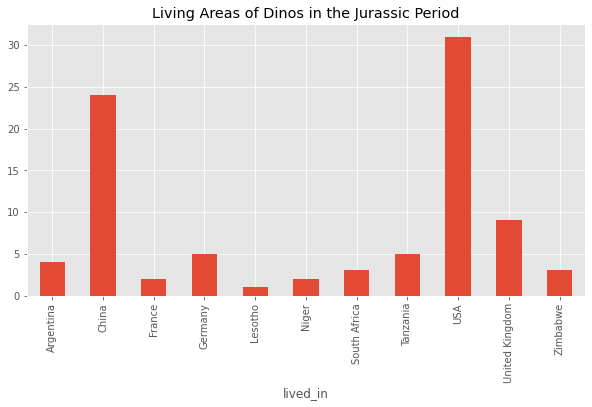

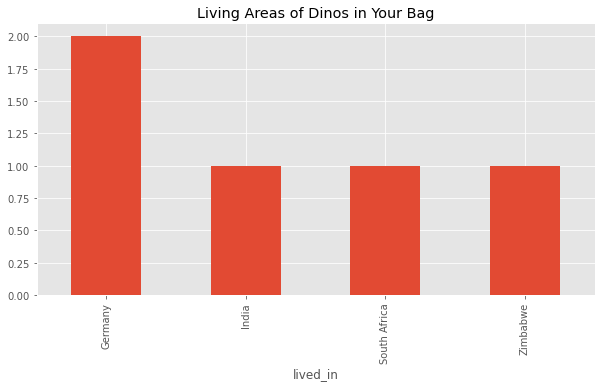

In [14]:
# runs dino_lived functions to print visualizations
if time_period == "Jurassic":
    dino_lived(dino_name, only_jurassic)
elif time_period == "Triassic":
    dino_lived(dino_name, only_triassic)
else:
    dino_lived(dino_name, only_cretaceous)

In [15]:
# function that turns a string into a number
def turn_into_num(str):
    a= str.strip('m')
    return float(a)

In [16]:
# lengths for only the ones that DO have lengths
def dino_lengths(dino_name, period_df):
    only_lengths = period_df.dropna(subset=['length'])
    num_lengths = only_lengths.assign(length=only_lengths.get('length').apply(turn_into_num))
    average_length = np.mean(num_lengths.get('length'))
    dino_length = num_lengths.set_index('Name').get('length').loc[dino_name]
    print("The selected dinosaur had a length of: " + str(dino_length) +'m')
    
    # histogram of ALL dino lengths in this period
    num_lengths.plot(kind='hist', y='length', density=True, legend=False, title='Lengths of Dinos in the ' + time_period + ' Period');
    
    # this dino's length
    stan_dev=np.std(num_lengths.get('length'))/3
    top_value=num_lengths[(num_lengths.get('length')<average_length+stan_dev) & (num_lengths.get('length')>average_length-stan_dev)].shape[0] /num_lengths.shape[0]
    x=np.array([dino_length, dino_length])
    y=np.array([0, top_value])
    # x,y we didn't learn this in dsc10 but basically the arrays are the range of the x and y values of the line we plot
    plt.plot(x, y, label= dino_name + ' length')
    plt.legend()
    
    # average length
    j=np.array([average_length, average_length])
    k=np.array([0, top_value])
    plt.plot(j, k, label= 'Average dino length')
    plt.legend()
    plt.show()
    
    # dinos in selected sample
    samp_df1 = sampled.dropna(subset=['length'])
    samp_df=samp_df1.assign(length=samp_df1.get('length').apply(turn_into_num))
    avg_len_samp = np.mean(samp_df.get('length'))
    samp_df.plot(kind='hist', y='length', density=True, legend=False, title='Lengths of Dinos in Your Bag');
    #same dino length line as before
    plt.plot(x, y, label= dino_name + ' length')
    plt.legend()
    #average of sample
    a=np.array([avg_len_samp, avg_len_samp])
    b=np.array([0,top_value])
    plt.plot(a, b, label= 'Average dino length in sample')
    plt.legend()
    plt.show()
    
    if dino_length < average_length and dino_length < avg_len_samp:
        print('The length of the '+ dino_name+' is below average. It would make a small dino nugget!')
    else:
        print('The length of the '+dino_name+' is above average. That would be a big dino nugget!')

The selected dinosaur had a length of: 0.65m


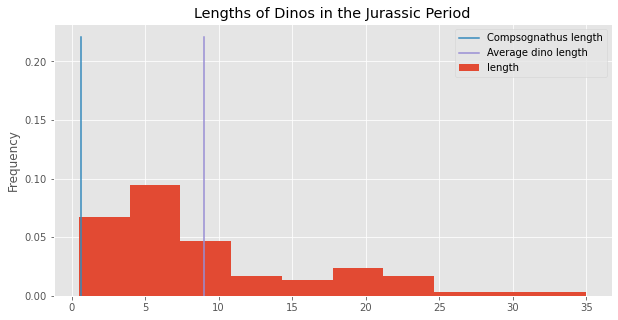

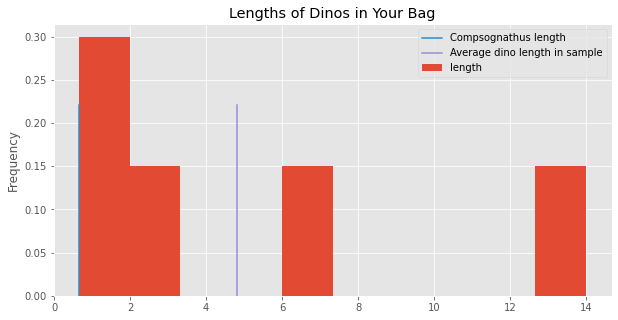

The length of the Compsognathus is below average. It would make a small dino nugget!


In [17]:
# runs dino_lengths functions to print visualizations
if time_period == "Jurassic":
    dino_lengths(dino_name, only_jurassic)
elif time_period == "Triassic":
    dino_lengths(dino_name, only_triassic)
else:
    dino_lengths(dino_name, only_cretaceous)